# **Credit Risk Classification: Developing a Predictive Model for Lending Decisions**
# by Mardio Edana Putra


# Goal

Proyek ini bertujuan untuk **menganalisis data historis pinjaman** guna mengidentifikasi pola dan faktor yang mempengaruhi risiko kredit. Selanjutnya, proyek ini akan **membangun model klasifikasi** yang dapat memprediksi apakah suatu pinjaman berisiko tinggi atau rendah. Hasil dari proyek ini akan digunakan untuk **membantu perusahaan lending dalam membuat keputusan persetujuan pinjaman yang lebih akurat**, mengurangi **Non-Performing Loans (NPLs)**, serta meningkatkan **efisiensi manajemen risiko kredit**.

# Objectives

- Mengembangkan model klasifikasi untuk memprediksi risiko pinjaman secara akurat dan mendukung pengambilan keputusan kredit yang lebih baik.  
- Menganalisis data historis pinjaman untuk mengidentifikasi pola dan faktor utama yang mempengaruhi kinerja pinjaman.

## **Libraries Used:**

* **Pandas** and **NumPy** for data analysis and manipulation
* **Matplotlib** and **Seaborn** for data visualization
* **Scipy** for statistical analysis
* **Scikit-learn** for machine learning

In [3]:
# Import library yang dibutuhkan
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# **Read Dataset**

In [4]:
# Membaca file
df = pd.read_csv('/content/loan_data_2007_2014.csv')

# Menampilkan data yang dibaca
df

<ipython-input-4-168dc2c2d875>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### **Ringkasan DataFrame (`df.info()`)**  

1. **Ukuran Dataset**:  
   - **466.285 baris × 75 kolom**  

2. **Tipe Data Kolom**:  
   - **46 kolom numerik (float64)** → Termasuk `int_rate`, `installment`, `dti`, `total_pymnt`, dll.  
   - **7 kolom integer (int64)** → Termasuk `id`, `member_id`, `loan_amnt`, dll.  
   - **22 kolom kategorikal (object)** → Termasuk `term`, `grade`, `sub_grade`, `loan_status`, dll.  

3. **Kolom dengan Missing Values**:  
   - **19 kolom memiliki sebagian missing values**:  
     - `emp_title` (27.588 missing), `emp_length` (21.008 missing), `annual_inc` (4 missing), `desc` (340.304 missing), `title` (21 missing), dll.  
   - **13 kolom sepenuhnya kosong (0 non-null)**:  
     - `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`.  

4. **Kolom Target Kemungkinan**:  
   - **`loan_status`** → Indikator utama yang menunjukkan status pinjaman (misalnya, "Charged Off", "Fully Paid", dll.).

# Penentuan Fitur Target

In [6]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


Untuk membuat fitur target baru `status_loan`, kita bisa mengelompokkan status pinjaman (`loan_status`) ke dalam dua kategori:  

- **Good Loan (1):** Pinjaman yang dianggap berhasil atau tidak memiliki risiko gagal bayar.  
  - `Current` → Pinjaman masih berjalan dengan pembayaran lancar.  
  - `Fully Paid` → Pinjaman telah dilunasi sepenuhnya.  
  - `Does not meet the credit policy. Status: Fully Paid` → Pinjaman yang awalnya tidak memenuhi kebijakan kredit tetapi telah dilunasi.  

- **Bad Loan (0):** Pinjaman yang bermasalah atau gagal bayar.  
  - `Charged Off` → Pinjaman gagal bayar dan dianggap sebagai kerugian oleh pemberi pinjaman.  
  - `Default` → Pinjaman dalam kondisi gagal bayar parah.  
  - `Late (31-120 days)` → Pembayaran tertunda lebih dari 30 hari, berisiko gagal bayar.  
  - `Late (16-30 days)` → Pembayaran tertunda lebih dari 15 hari, berisiko tinggi untuk gagal bayar.  
  - `In Grace Period` → Dalam masa tenggang setelah jatuh tempo, menunjukkan risiko keterlambatan.  
  - `Does not meet the credit policy. Status: Charged Off` → Pinjaman yang tidak memenuhi kebijakan kredit dan mengalami gagal bayar.  

Dengan aturan ini,  fitur `status_loan` dibuat sebagai variabel biner (1 = Good, 0 = Bad) yang akan digunakan untuk analisis lebih lanjut atau model prediksi.

In [7]:
# Kategori Good Loan (1) dan Bad Loan (0)
good_loans = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loans = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Does not meet the credit policy. Status:Charged Off']

# Menambahkan kolom status_loan
df['status_loan'] = df['loan_status'].apply(lambda x: 1 if x in good_loans else 0)

# Menampilkan hasil
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,status_loan
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,1
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,1
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,1


In [8]:
df['status_loan'].value_counts()

,count
status_loan,
1,410953
0,55332


# **Exploratory Data Analysis**

# Descriptive Statistics

In [9]:
# Pisahkan kolom numerikal dan kategorikal
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("Kolom Numerikal:", num_cols)
print("Kolom Kategorikal:", cat_cols)


Kolom Numerikal: ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'status_loan']
Kolom Kategorikal: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'v

In [10]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Berdasarkan statistik deskriptif, sebagian besar kolom numerikal menunjukkan bahwa **nilai mean sedikit lebih besar daripada median**, yang mengindikasikan adanya **distribusi skewed positif (condong ke kanan)**. Namun, karena perbedaannya tidak terlalu jauh pada banyak fitur, **beberapa distribusi masih dapat diasumsikan mendekati normal**. Sementara itu, kolom-kolom yang menunjukkan perbedaan cukup besar seperti out_prncp, out_prncp_inv antara mean dan median menandakan **distribusi skewed yang lebih tajam**, yang bisa menunjukkan keberadaan **outlier atau ekor distribusi yang panjang di sisi kanan**.

In [11]:
# Statistik deskriptif untuk kolom numerikal
df[cat_cols].describe().T


,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


### ✅ Rangkuman & Insight:

1. **`zip_code`** ➜ *Dihapus*  
   - Sudah terwakili oleh `addr_state` (lokasi geografis regional).  
   - Nilai unik tinggi, dan tidak terlalu menambah informasi.

2. **`title` & `desc`** ➜ *Dihapus*  
   - Sudah terwakili oleh `purpose` yang lebih terstruktur.  
   - `desc` juga banyak yang kosong.

3. **`emp_title`** ➜ *Dihapus*  
   - Nilai unik sangat tinggi (freestyle text), potensi noise.  

4. **`sub_grade`** ➜ *Dihapus*  
   - Redundan dengan `grade`, yang sudah cukup informatif.

5. **`application_type` ➜ *Dihapus*  
   - Tidak variatif, hampir seluruh nilai sama.

In [12]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'Unnamed: 0', 'id', 'member_id', 'policy_code',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util',
    'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'inq_fi', 'total_cu_tl', 'inq_last_12m',
    'emp_title', 'url', 'desc', 'title', 'zip_code', 'application_type',
    'sub_grade'  # redundant dengan 'grade'

]

# Hapus kolom-kolom dari dataframe
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' agar tidak error jika kolom tidak ditemukan

# Tampilkan sisa kolom
print("Sisa kolom setelah dibersihkan:", df_cleaned.columns.tolist())


Sisa kolom setelah dibersihkan: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'status_loan']


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

# **Univariate Analysis**

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

In [15]:
# Pisahkan kolom numerikal dan kategorikal
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'status_loan']
Categorical columns: ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


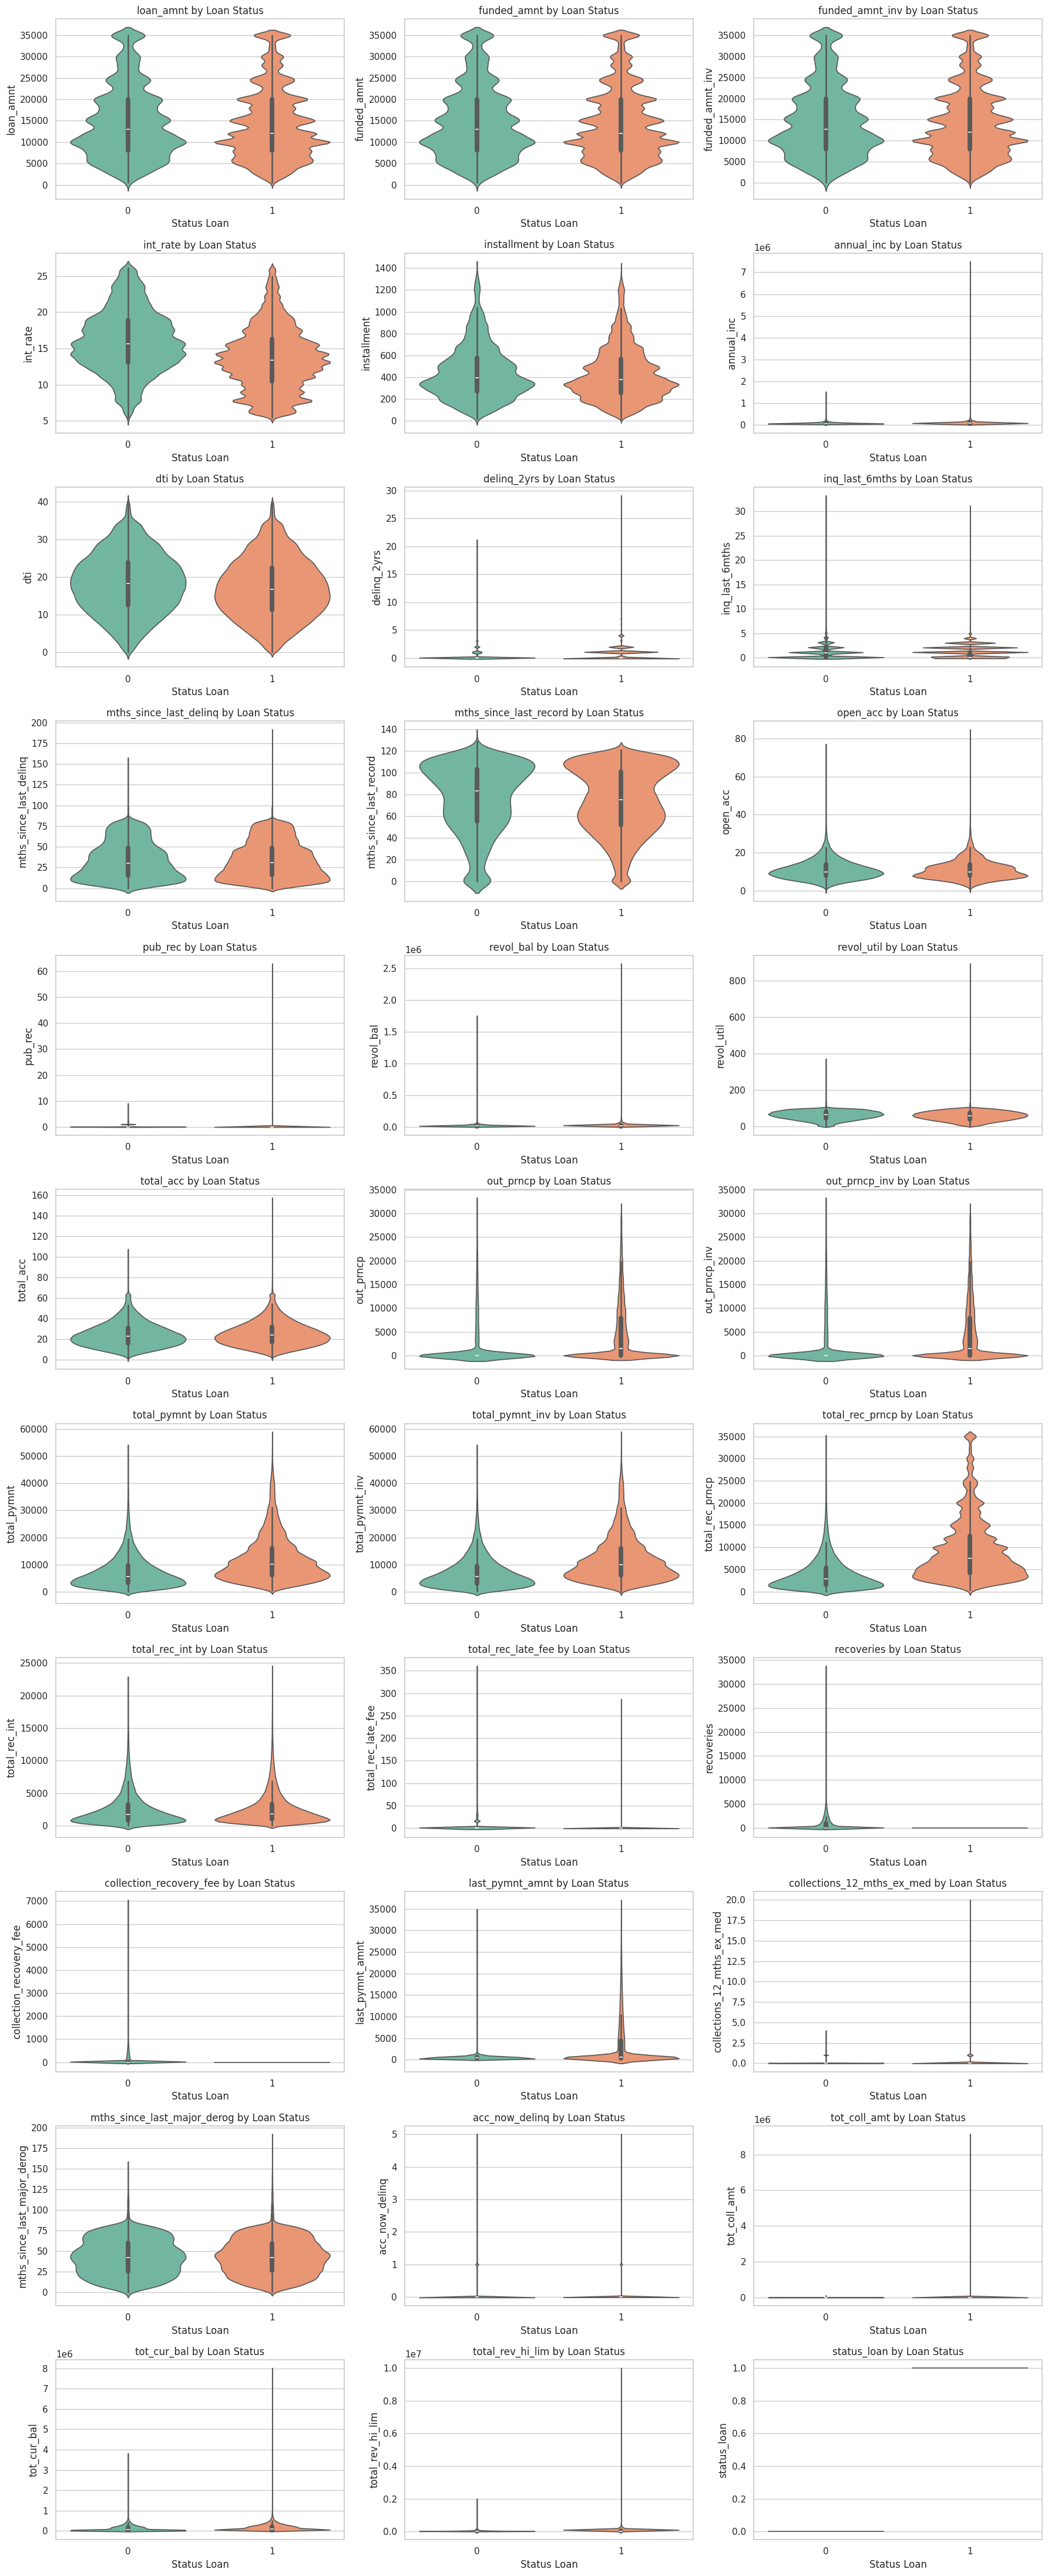

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Atur style
sns.set(style="whitegrid")

# Gunakan semua kolom numerikal
cols_to_plot = num_cols
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='status_loan', y=col, data=df_cleaned, hue='status_loan', legend=False, palette='Set2')
    plt.title(f'{col} by Loan Status')
    plt.xlabel('Status Loan')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### 🔹 **Distribusi Umum**
- Mayoritas kolom skewed ke kanan (nilai kecil dominan, banyak outlier besar).
- Contoh: `annual_inc`, `revol_bal`, `total_pymnt`, dll.

### 🔹 **Pinjaman & Pembayaran**
- `loan_amnt`, `funded_amnt`, `installment` distribusinya mirip dan simetris.
- `total_pymnt` dan `out_prncp` punya outlier besar.

### 🔹 **Pendapatan & Utang**
- `annual_inc` sangat bervariasi, banyak peminjam berpendapatan rendah-menengah.
- `dti` umumnya di bawah 20, ada sedikit yang sangat tinggi.

### 🔹 **Riwayat Kredit**
- `inq_last_6mths`, `delinq_2yrs`, `pub_rec` banyak nol → histori kredit bersih.
- `open_acc` & `total_acc` cenderung rendah dengan beberapa outlier.

### 🔹 **Outlier Signifikan**
- Terlihat jelas di `annual_inc`, `revol_bal`, `revol_util`, `total_pymnt`, dll.

# **EDA Kolom Kategorikal**

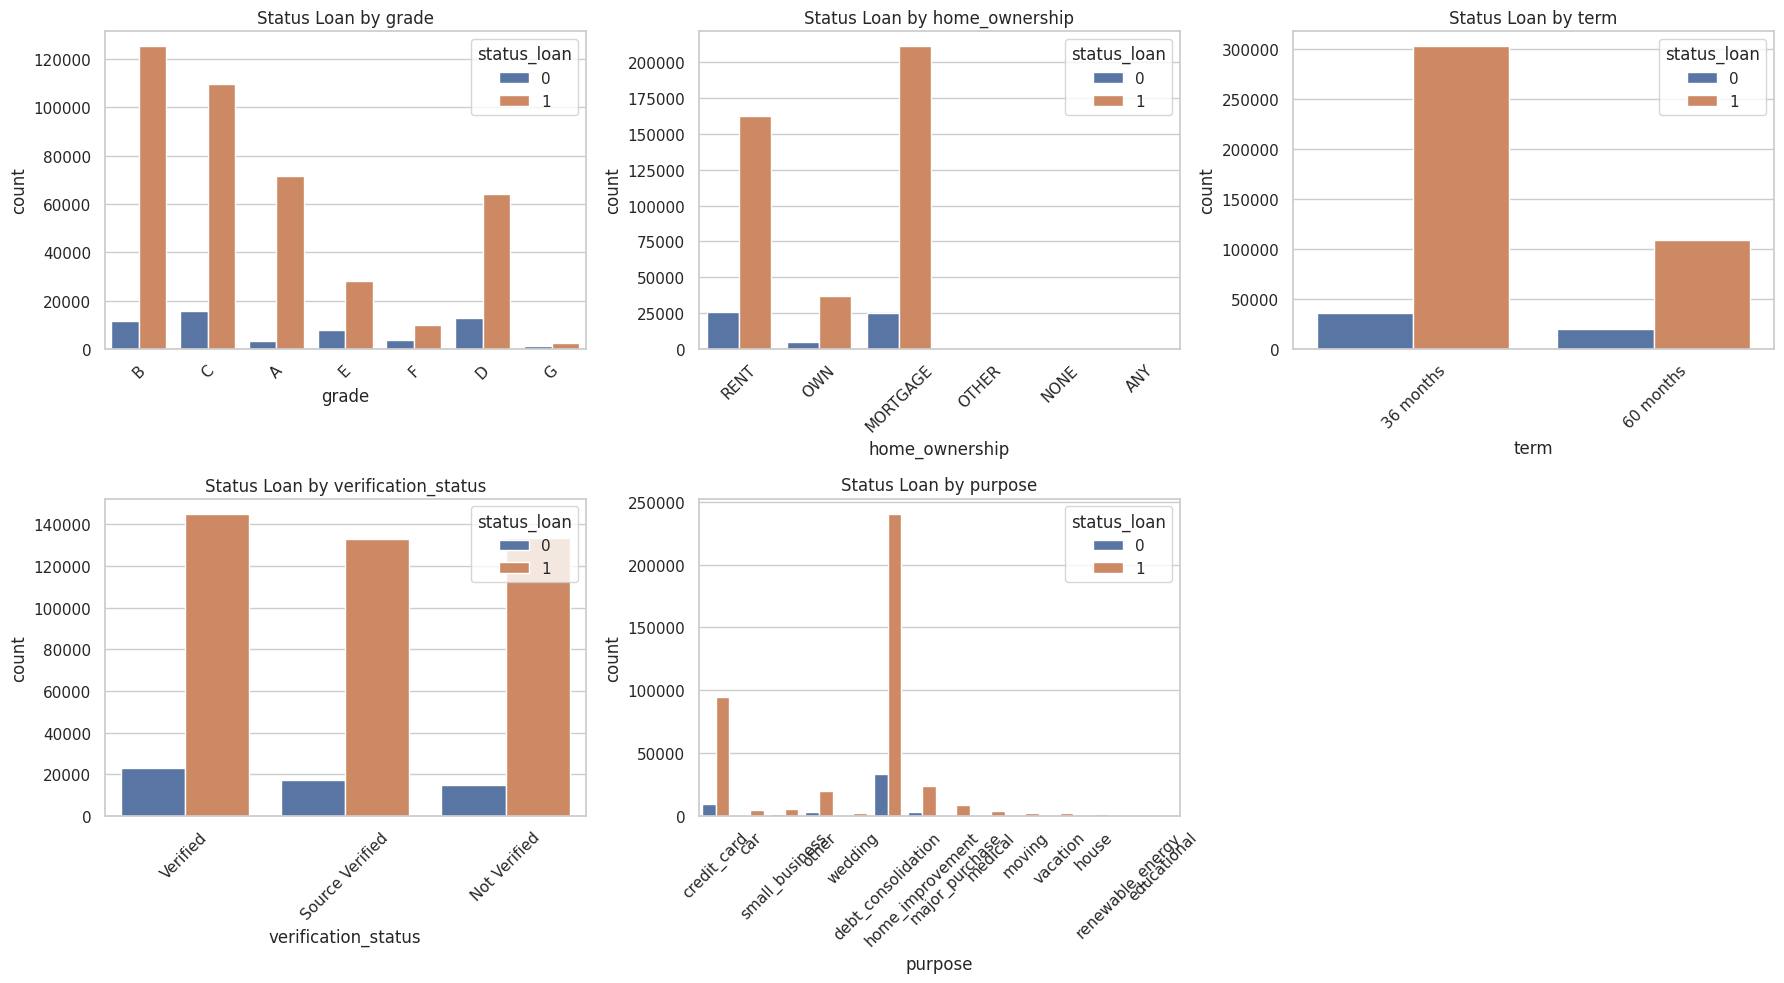

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur kategorikal yang ingin dianalisis
categorical_features = ['grade', 'home_ownership', 'term', 'verification_status', 'purpose']

# Buat subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot bar chart untuk masing-masing fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_cleaned, x=feature, hue='status_loan', ax=axes[i])
    axes[i].set_title(f'Status Loan by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika jumlah fitur tidak habis dibagi jumlah kolom
if len(categorical_features) < len(axes):
    for j in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### ✅ **Kesimpulan EDA Status Loan (Approved vs Rejected)**

1. **Grade**
   - Mayoritas pinjaman disetujui pada grade **B, C, dan A**.
   - Grade rendah seperti **F dan G** cenderung memiliki proporsi penolakan lebih tinggi, menandakan skor kredit lebih rendah cenderung tidak disetujui.

2. **Home Ownership**
   - Peminjam dengan status **MORTGAGE** dan **RENT** mendominasi persetujuan pinjaman.
   - Meski demikian, **status OWN (kepemilikan rumah sendiri)** justru memiliki proporsi lebih besar dalam pinjaman yang ditolak, bisa jadi karena keterkaitan dengan profil risiko atau usia.

3. **Term (Durasi Pinjaman)**
   - Pinjaman dengan **jangka waktu 36 bulan** jauh lebih sering disetujui dibandingkan 60 bulan.
   - Pinjaman jangka panjang (60 bulan) cenderung lebih berisiko sehingga lebih banyak ditolak.

4. **Verification Status**
   - Mayoritas pinjaman disetujui berasal dari pengguna yang **Verified** atau **Source Verified**.
   - Pengguna dengan **status Not Verified** memiliki peluang ditolak lebih tinggi, menunjukkan verifikasi berpengaruh besar terhadap keputusan pinjaman.

5. **Purpose (Tujuan Pinjaman)**
   - **Debt consolidation** dan **credit card** menjadi dua tujuan utama pinjaman yang paling banyak disetujui.
   - Namun, pinjaman untuk **small_business**, **educational**, dan **house** cenderung lebih banyak ditolak, menandakan tingkat risiko lebih tinggi pada tujuan tersebut.

# **Multivariate Analysis**

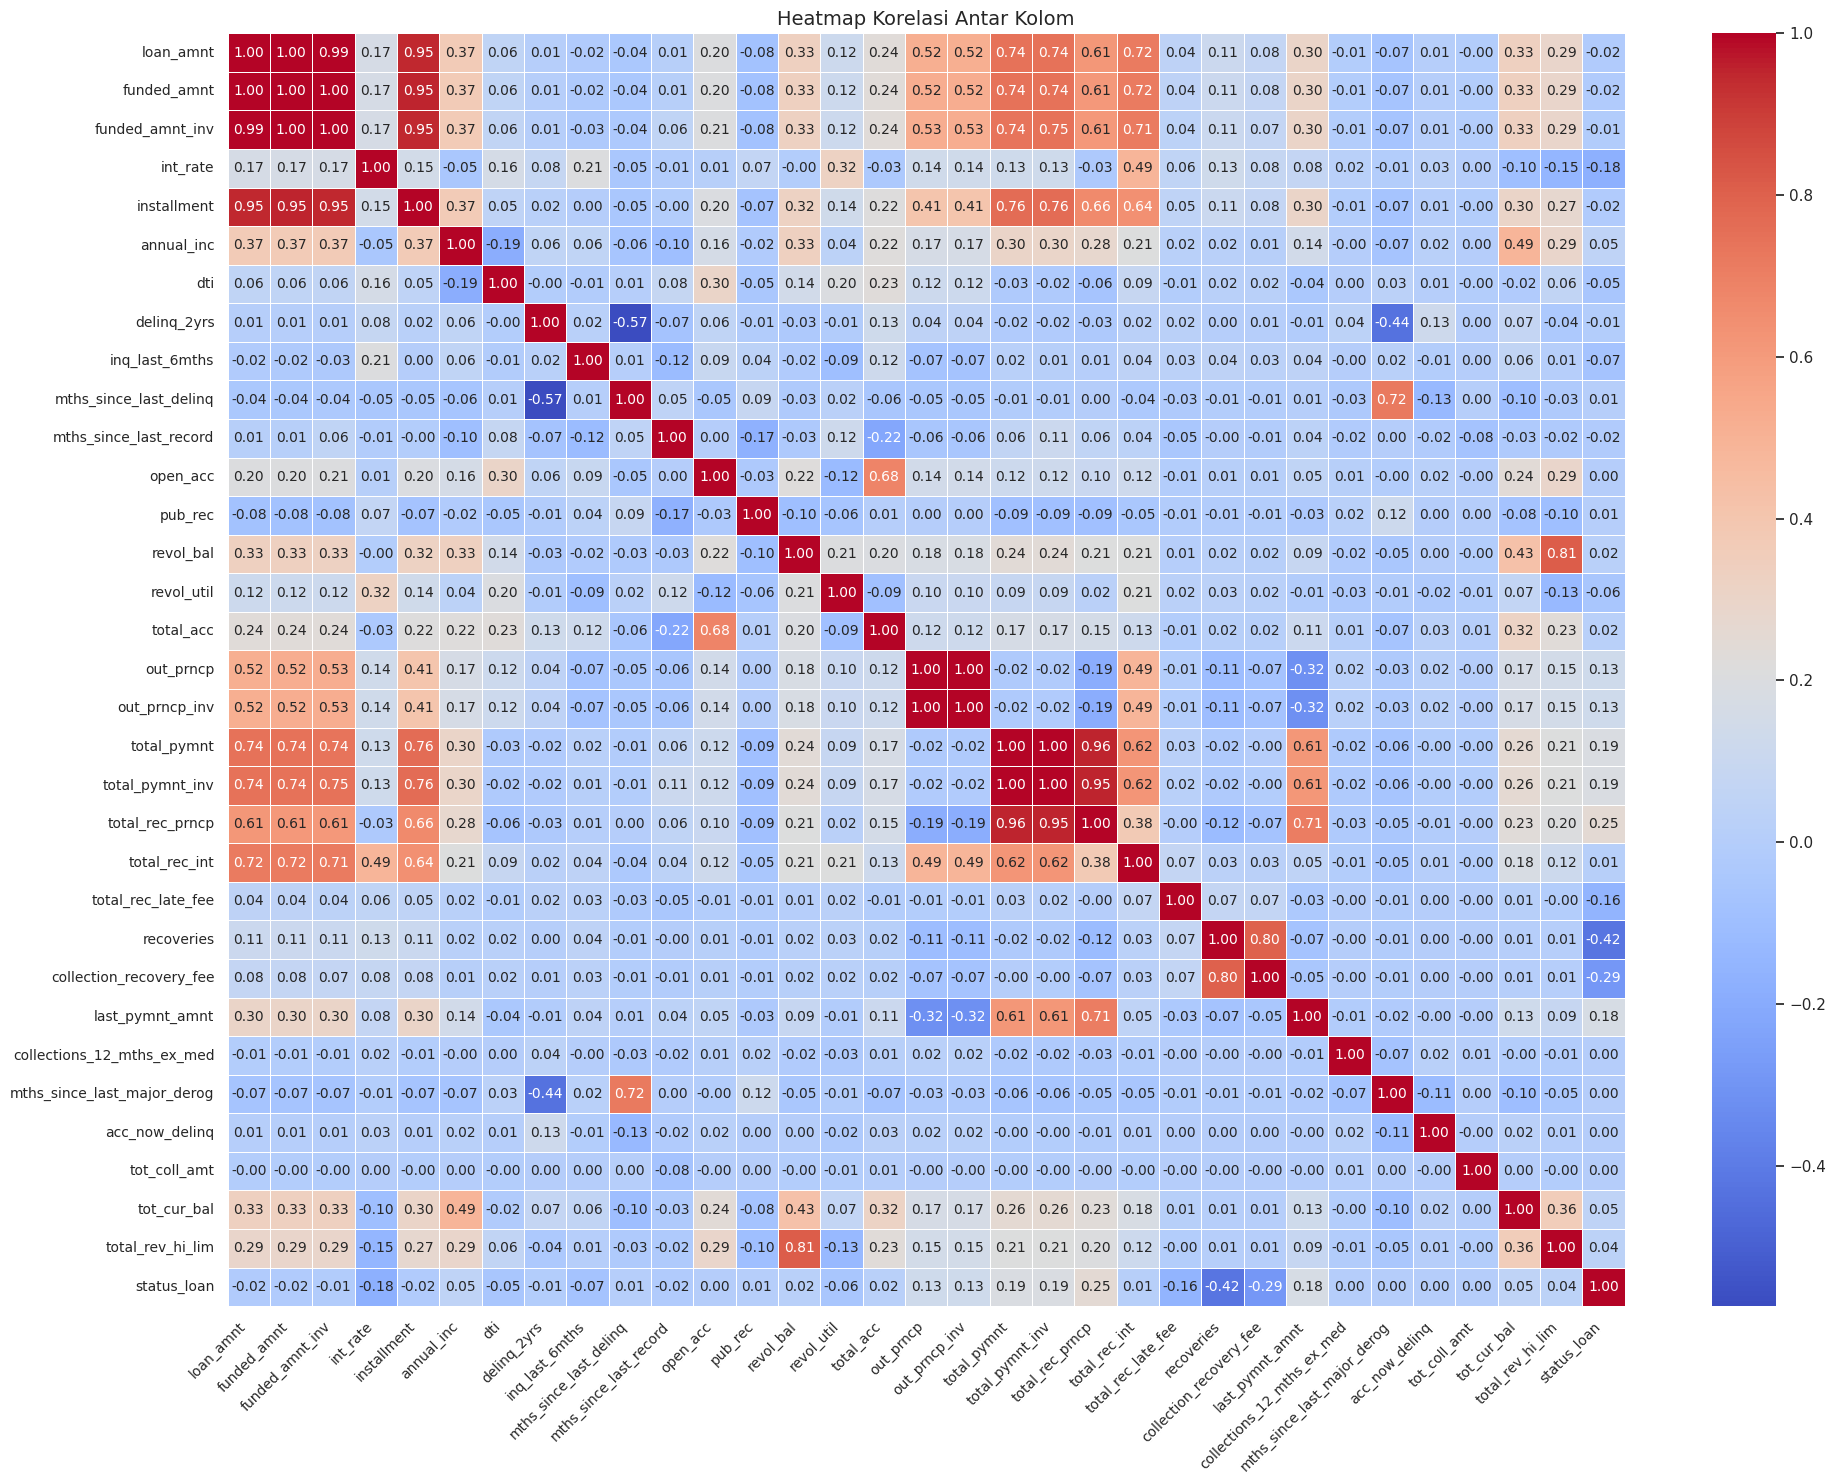

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar kolom numerik
correlation_matrix = df_cleaned[num_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(20, 15))  # Perbesar ukuran heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            annot_kws={"size": 10})  # Ukuran angka di kotak heatmap

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi dan ukuran label sumbu x
plt.yticks(fontsize=10)  # Ukuran label sumbu y
plt.title("Heatmap Korelasi Antar Kolom", fontsize=14)
plt.tight_layout()  # Supaya tidak terpotong
plt.show()


1. 🔁 **`loan_amnt`, `funded_amnt`, `funded_amnt_inv`, dan `installment`** sangat berkorelasi satu sama lain → cukup pilih satu untuk hindari multikolinearitas.

2. 💸 **`total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, dan `out_prncp`** saling berkorelasi sangat kuat → hanya satu atau dua perlu dipertahankan.

3. 📈 **`int_rate`** cukup relevan dan tidak terlalu berkorelasi tinggi dengan fitur lainnya → bisa dipertahankan.

4. ⚠️ **`mths_since_last_delinqu` vs `delinq_2yrs`** menunjukkan korelasi negatif → tidak langsung menyebabkan multikolinearitas, tapi hati-hati jika dipakai bersamaan.

5. 🧩 Fitur seperti `pub_rec`, `recoveries`, `collection_recovery_fee`, dan `collections_12_mths_ex_med` memiliki korelasi rendah dengan yang lain → tidak menimbulkan multikolinearitas tapi mungkin tidak terlalu informatif.

# **Data Cleaning**

# Cek Missing Values

In [21]:
# Cek jumlah missing values di setiap kolom
print(df_cleaned.isnull().sum())

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc   

#### **Insight**

#### ✅ **Imputasi (karena missing value kecil atau moderat)**:
- `emp_length` : Bisa imputasi dengan **<1 year** (diasumsikan tidak berpengalaman)
- `last_pymnt_d, last_credit_pull_d`, 'earliest_cr_line : Bisa imputasi dengan **modus**
- `annual_inc` (4 data): **Imputasi median**
- `delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `total_acc`, `revol_util`, `collections_12_mths_ex_med`, `acc_now_delinq`: semua ini <0.1% → **imputasi median** (numerik)

#### ⚠️ **Drop kolom(karena missing value sangat besar)**:
- `mths_since_last_delinq` (**~53.7% missing**)
- `mths_since_last_record` (**~86.5% missing**)
- `mths_since_last_major_derog` (**~78.8% missing**)

#### 🔍 **Pertimbangan lain kolom yang didrop**:
- `tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim`: sekitar **15% missing**

In [22]:
# Drop kolom dengan missing value terlalu besar
cols_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'next_pymnt_d']
df_cleaned2 = df_cleaned.drop(columns=cols_to_drop)

In [23]:
# Imputasi dengan median
median_impute_cols = [
    'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq'
]
for col in median_impute_cols:
    df_cleaned2[col] = df_cleaned2[col].fillna(df_cleaned2[col].median())


In [24]:
# Mengimputasi dengan modus untuk kolom yang memiliki missing values
df_cleaned2['earliest_cr_line'].fillna(df_cleaned2['earliest_cr_line'].mode()[0], inplace=True)

df_cleaned2['last_pymnt_d'].fillna(df_cleaned2['last_pymnt_d'].mode()[0], inplace=True)

df_cleaned2['last_credit_pull_d'].fillna(df_cleaned2['last_credit_pull_d'].mode()[0], inplace=True)


<ipython-input-24-f2a89ee28dc9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned2['earliest_cr_line'].fillna(df_cleaned2['earliest_cr_line'].mode()[0], inplace=True)
<ipython-input-24-f2a89ee28dc9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [25]:
# Imputasi dengan < 1 year
df_cleaned2['emp_length'].fillna('< 1 year', inplace = True)

<ipython-input-25-d58e4cf27648>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned2['emp_length'].fillna('< 1 year', inplace = True)


In [26]:
df_cleaned2.isnull().sum().sort_values(ascending=False)

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0


# Cek Duplikasi Data

In [27]:
# Mengecek jumlah baris duplikat
duplicate_rows = df_cleaned2.duplicated().sum()
print(f"Jumlah duplikasi: {duplicate_rows}")


Jumlah duplikasi: 0


# **Feature Engineering**

In [28]:
# Ubah tipe data menjadi format tanggal (datetime)
df_cleaned2['issue_d'] = pd.to_datetime(df_cleaned2['issue_d'], format='%b-%y', errors='coerce')  # Tanggal pinjaman diterbitkan
df_cleaned2['earliest_cr_line'] = pd.to_datetime(df_cleaned2['earliest_cr_line'], format='%b-%y', errors='coerce')  # Tanggal pertama kali punya kredit
df_cleaned2['last_pymnt_d'] = pd.to_datetime(df_cleaned2['last_pymnt_d'], format='%b-%y', errors='coerce')  # Tanggal pembayaran terakhir
df_cleaned2['last_credit_pull_d'] = pd.to_datetime(df_cleaned2['last_credit_pull_d'], format='%b-%y', errors='coerce')  # Tanggal terakhir cek kredit

In [29]:
# Feature engineering

# 1. Umur pinjaman dalam bulan
df_cleaned2['loan_age'] = (df_cleaned2['last_pymnt_d'] - df_cleaned2['issue_d']).dt.days

# 2. Panjang riwayat kredit dalam bulan
df_cleaned2['credit_history'] = (df_cleaned2['issue_d'] - df_cleaned2['earliest_cr_line']).dt.days

# 3. Waktu sejak terakhir tarik data kredit (dalam bulan)
df_cleaned2['days_since_last_credit_pull'] = (df_cleaned2['last_credit_pull_d'] - df_cleaned2['issue_d']).dt.days

In [30]:
# Buang kolom tanggal-tanggal yang sudah tidak terpakai
df_cleaned2.drop(columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace = True)

# **Feature Encoding**

In [31]:
# Buat dataset baru 'data'
data = df_cleaned2.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   466285 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466285 non-null  float64
 10  verification_status          466285 non-null  object 
 11  loan_status                  466285 non-null  object 
 12  pymnt_plan                   466285 non-null  object 
 13 

In [32]:
# Pisahkan kolom berdasarkan tipe datanya
kolom_kat = data.select_dtypes(include='object').columns
kolom_num= data.select_dtypes(exclude='object').columns

# Tampilkan hasilnya
print("Kolom kategorikal:")
print(kolom_kat.tolist())

print("\nKolom numerikal:")
print(kolom_num.tolist())


Kolom kategorikal:
['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']

Kolom numerikal:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'status_loan', 'loan_age', 'credit_history', 'days_since_last_credit_pull']


In [33]:
# Deskripsi kolom kategorikal
data[kolom_kat].describe()

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,11,6,3,9,2,14,50,2
top,36 months,B,10+ years,MORTGAGE,Verified,Current,n,debt_consolidation,CA,f
freq,337953,136929,150049,235875,168055,224226,466276,274195,71450,303005


**Label Encoding**

In [34]:
from sklearn.preprocessing import LabelEncoder

# Salin data asli
label_encoded_data = data.copy()

# Kolom-kolom yang akan di-label encode
label_encode_cols = ['term', 'grade', 'emp_length', 'pymnt_plan', 'initial_list_status']

# Simpan encoder kalau butuh inverse transform nanti
label_encoders = {}

for col in label_encode_cols:
    le = LabelEncoder()
    label_encoded_data[col] = le.fit_transform(label_encoded_data[col])
    label_encoders[col] = le

**One Hot Encoding**

In [35]:
# Salin data hasil label encode dulu
onehot_encoded_data = label_encoded_data.copy()

# Kolom-kolom yang akan di-one-hot encode
onehot_encode_cols = ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

# One-hot encode, drop_first=True untuk menghindari multikolinearitas
onehot_encoded_data = pd.get_dummies(onehot_encoded_data, columns=onehot_encode_cols, drop_first=True)

# Konversi True/False ke 1/0
onehot_encoded_data = onehot_encoded_data.astype(int)


In [36]:
onehot_encoded_data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,status_loan,loan_age,credit_history,days_since_last_credit_pull,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
356106,22000,22000,22000,0,6,669,0,1,80000,0,14,0,0,10,0,18101,27,29,1,11495,11495,12052,12052,10504,1548,0,0,0,669,0,0,1,549,4686,549,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431808,10000,10000,10000,1,15,239,2,0,36000,0,6,1,0,13,0,6097,64,24,1,7177,7177,5269,5269,2822,2447,0,0,0,239,0,0,1,671,2343,671,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428855,13000,13000,13000,0,12,434,1,5,52500,0,15,0,0,5,0,5037,83,25,1,0,0,14619,14619,13000,1619,0,0,0,8966,0,0,1,426,4169,457,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
418204,28000,28000,27900,0,10,916,1,7,150000,0,32,0,1,11,0,39855,63,26,0,12790,12745,19247,19179,15209,4038,0,0,0,916,0,0,1,671,12081,671,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
264299,5000,5000,5000,0,8,157,0,1,72000,0,1,0,0,7,0,4909,20,12,1,0,0,5411,5411,5000,411,0,0,0,3367,0,0,1,426,4597,457,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Feature Selection**

### 📘 **Konsep: Mutual Information (MI)**

**Mutual Information** mengukur **seberapa banyak informasi** yang dimiliki oleh satu fitur (X) terhadap target (y). Artinya:

> **Semakin tinggi nilai MI antara fitur dan target, semakin informatif fitur tersebut untuk memprediksi target.**

Ciri khas Mutual Information:
- Bisa menangkap **hubungan non-linear** (tidak hanya korelasi linier).
- Bisa dipakai untuk **klasifikasi maupun regresi**.
- Nilai MI:
  - **0** → Tidak ada hubungan/informasi.
  - **Lebih besar dari 0** → Ada informasi.
  - **Tidak dibatasi atas** → Nilainya bisa lebih dari 1 tergantung skala data.

---

### 📌 **Langkah-langkah Menggunakan MI untuk Feature Selection**

1. Tentukan **X** (fitur) dan **y** (target).
2. Hitung **mutual information score** antara semua fitur di `X` terhadap `y`.
3. Urutkan dari yang paling informatif.
4. Pilih fitur terbaik berdasarkan nilai MI tertinggi

In [37]:
from sklearn.feature_selection import mutual_info_classif

# X = fitur, y = target
X = onehot_encoded_data.drop(columns='status_loan')
y = onehot_encoded_data['status_loan']

# Hitung MI
mi = mutual_info_classif(X, y)

In [38]:
# Dataframe baru
mi_data = pd.DataFrame({'Features': X.columns, 'MI Scores': mi})
mi_data.sort_values('MI Scores', ascending = False, ignore_index = True, inplace = True)

# Menampilkan semua kolom
pd.set_option('display.max_rows', None)
mi_data

,Features,MI Scores
0,loan_status_Current,0.155245
1,recoveries,0.123928
2,collection_recovery_fee,0.115024
3,loan_status_Fully Paid,0.113424
4,total_rec_prncp,0.102138
5,purpose_debt_consolidation,0.070032
6,home_ownership_MORTGAGE,0.063981
7,last_pymnt_amnt,0.046185
8,loan_age,0.045998
9,home_ownership_RENT,0.039583


In [39]:
# Ambil top 25 fitur berdasarkan skor MI
top_25_features = mi_data.head(25)['Features'].tolist()

# Buat DataFrame baru hanya dengan 25 fitur teratas
X_top25 = X[top_25_features]

# **Multivariate Analysis 2**

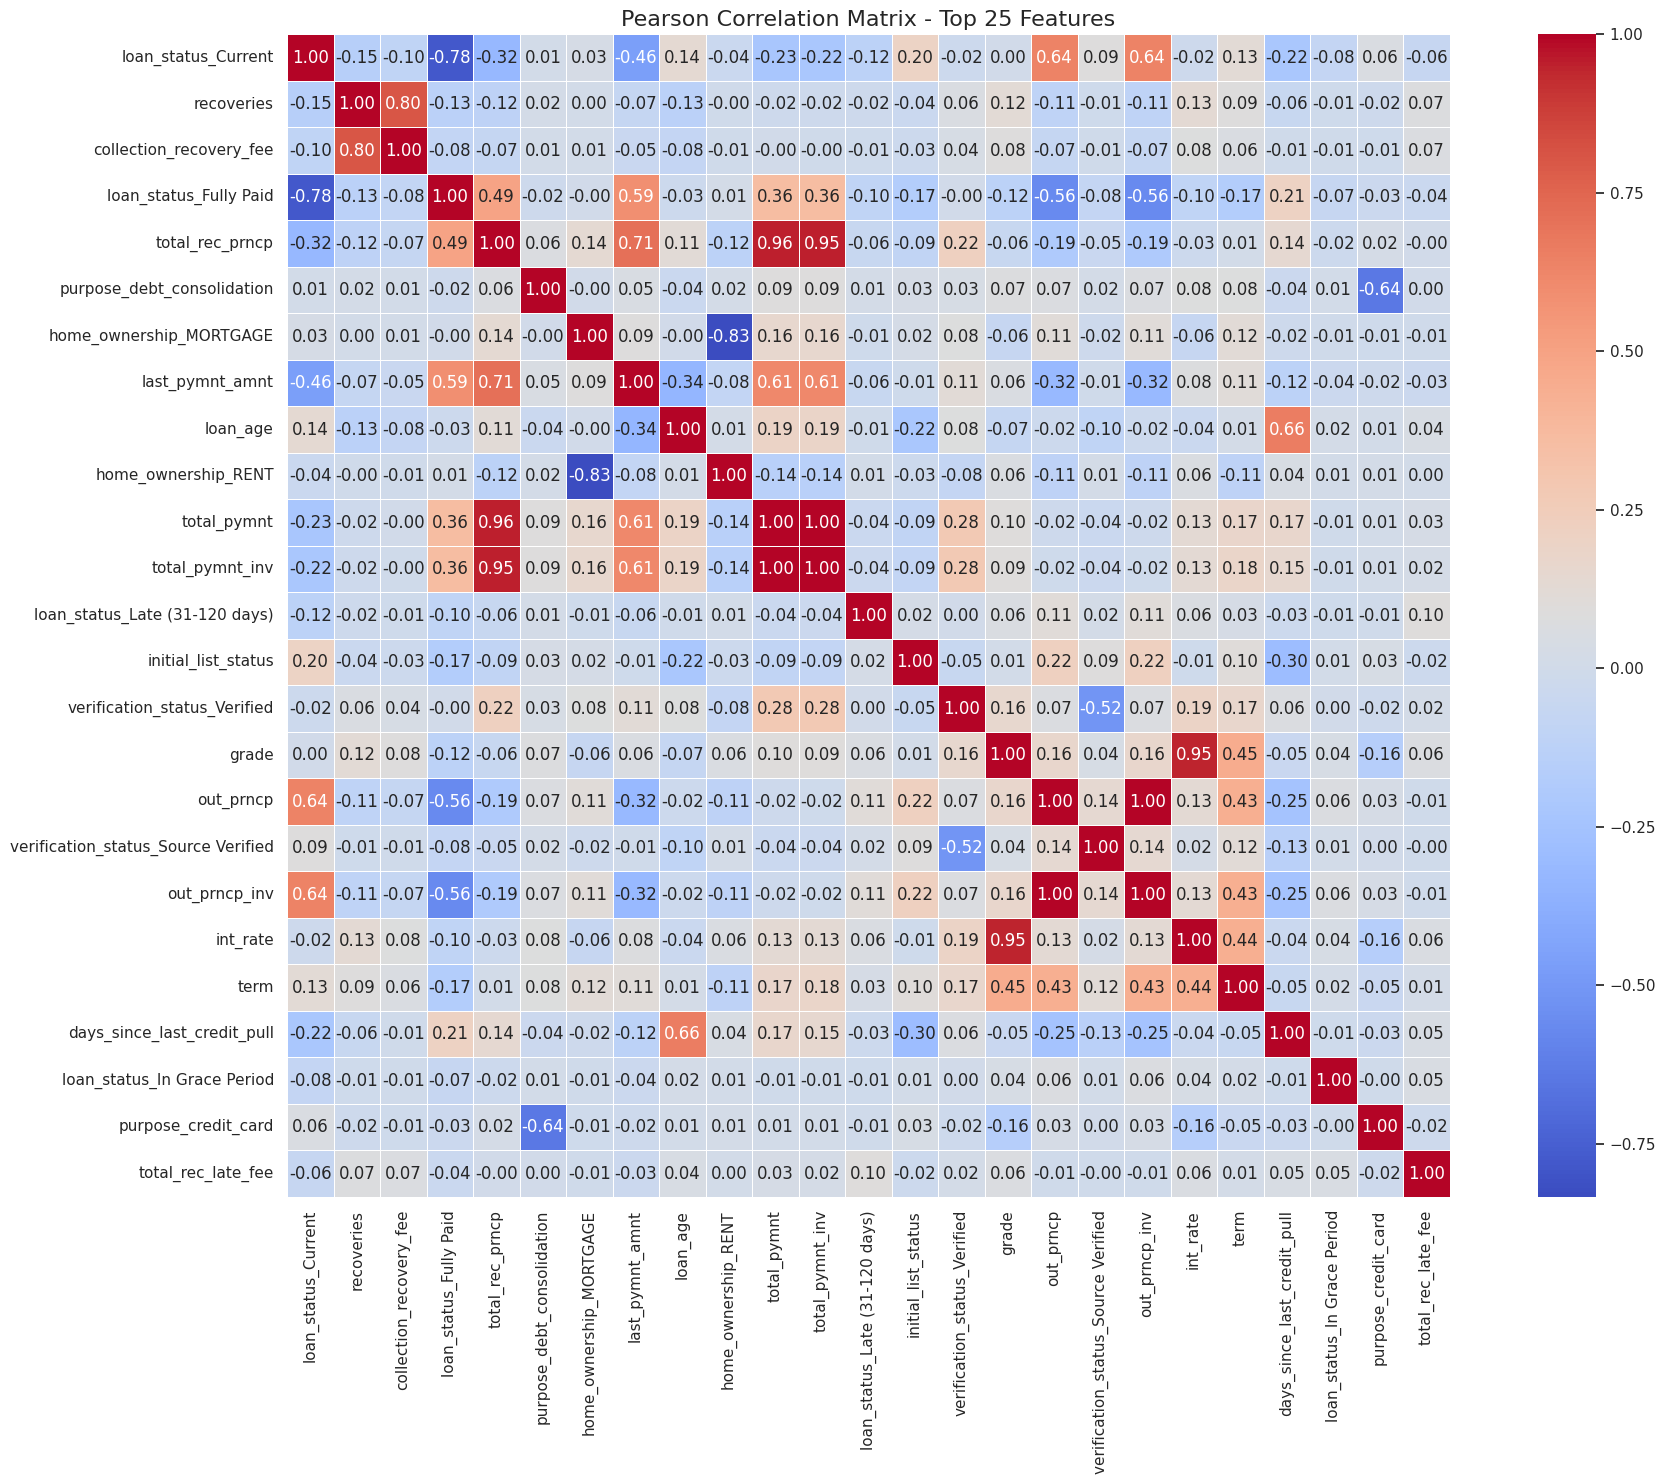

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi Pearson
corr_matrix = X_top25.corr(method='pearson')

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Pearson Correlation Matrix - Top 25 Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Beberapa fitur diputuskan untuk dihapus dari pemodelan karena memiliki korelasi yang sangat tinggi dengan fitur lain (indikasi kuat terjadinya multikolinearitas), sehingga keberadaannya dianggap redundant. Fitur `total_pymnt_inv` dihapus karena memiliki korelasi sangat tinggi (0.96) dengan `total_pymnt`, yang artinya kedua fitur membawa informasi hampir sama, dan mempertahankannya bisa membingungkan model. Selanjutnya, `out_prncp` dan `out_prncp_inv` juga dihapus karena secara korelasi nyaris identik satu sama lain (nilai korelasi mendekati 1), dan informasi tentang besar pinjaman yang masih harus dibayar sudah cukup diwakili oleh variabel `grade` yang juga berkorelasi tinggi dengan mereka. Fitur `purpose_credit_card` dihapus karena tujuannya masih satu kategori besar dengan `purpose_debt_consolidation`, sehingga dianggap membawa informasi yang serupa. Terakhir, `total_rec_late_fee` dihapus karena kontribusi informasinya rendah, terlihat dari korelasi yang sangat lemah terhadap variabel lain, serta kemungkinan memiliki nilai yang rendah atau bahkan nol pada sebagian besar data, sehingga tidak memberikan dampak berarti pada model.

In [41]:
# Daftar fitur yang akan dibuang karena multikolinearitas
drop_columns = [
    'total_pymnt_inv',
    'out_prncp_inv',
    'out_prncp',
    'purpose_credit_card',
    'total_rec_late_fee'
]

# DataFrame baru berisi 20 fitur terpilih
df_final = X_top25.drop(columns=drop_columns)

# Cek jumlah kolom hasil akhir
print(f"Jumlah fitur dalam df_final: {df_final.shape[1]}")
df_final.head()

Jumlah fitur dalam df_final: 20


,loan_status_Current,recoveries,collection_recovery_fee,loan_status_Fully Paid,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,last_pymnt_amnt,loan_age,home_ownership_RENT,total_pymnt,loan_status_Late (31-120 days),initial_list_status,verification_status_Verified,grade,verification_status_Source Verified,int_rate,term,days_since_last_credit_pull,loan_status_In Grace Period
0,0,0,0,1,5000,0,0,171,1127,1,5861,0,0,1,1,0,10,0,1492,0
1,0,117,1,0,456,0,0,119,487,1,1008,0,0,0,2,1,15,1,640,0
2,0,0,0,1,2400,0,0,649,913,1,3003,0,0,0,2,0,15,0,1492,0
3,0,0,0,1,10000,0,0,357,1127,1,12226,0,0,0,2,1,13,0,1127,0
4,1,0,0,0,2233,0,0,67,1492,1,3242,0,0,0,1,1,12,1,1492,0


# **Split Data**

In [42]:
# Pastikan y adalah 1D
y = onehot_encoded_data['status_loan']
print(y.shape)

# Gabungkan ke df_final
df_modeling = df_final.copy()
df_modeling['status_loan'] = y

# Split
from sklearn.model_selection import train_test_split

X = df_modeling.drop('status_loan', axis=1)
y = df_modeling['status_loan']  # ini udah Series

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

(466285,)


# **Standardisasi Data**

In [43]:
from sklearn.preprocessing import StandardScaler

# Daftar kolom yang perlu distandardisasi
scale_cols = ['recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'last_pymnt_amnt',
              'loan_age', 'total_pymnt', 'int_rate', 'days_since_last_credit_pull']

# Simpan kolom sisanya
non_scale_cols = [col for col in X.columns if col not in scale_cols]

# Standardisasi kolom numerik
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])


In [86]:
X_train_scaled.head(5)

,loan_status_Current,recoveries,collection_recovery_fee,loan_status_Fully Paid,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,last_pymnt_amnt,loan_age,home_ownership_RENT,total_pymnt,loan_status_Late (31-120 days),initial_list_status,verification_status_Verified,grade,verification_status_Source Verified,int_rate,term,days_since_last_credit_pull,loan_status_In Grace Period
89366,1,-0.153565,-0.103536,0,0.755398,1,1,-0.438291,0.732695,0,0.846306,0,0,0,2,1,0.165433,0,0.317103,0
60200,0,-0.153565,-0.103536,1,-0.549359,1,1,-0.028681,-0.315528,0,-0.735346,0,0,0,0,0,-1.436846,0,-0.526112,0
48972,1,-0.153565,-0.103536,0,2.612266,0,0,-0.031924,0.526487,0,2.487242,0,1,0,1,1,-0.292361,0,0.066343,0
456974,0,-0.153565,-0.103536,1,0.161758,0,1,0.957592,-1.253772,0,-0.091095,0,1,0,1,0,-0.292361,0,-0.019081,0
53877,1,-0.153565,-0.103536,0,-0.820437,1,0,-0.515780,0.526487,1,-0.618957,0,0,1,3,0,1.081021,1,0.066343,0


# **Modeling**

# Inisiasi Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Inisiasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Model Training dan Validation

In [91]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List untuk menyimpan hasil
results = []

# Loop untuk semua model
for name, model in models.items():
    start = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Proba untuk ROC AUC
    y_proba_train = model.predict_proba(X_train)
    y_proba_test = model.predict_proba(X_test)

    # Hitung metrik
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 5)

    precision_train = round(precision_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    precision_test = round(precision_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    recall_train = round(recall_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    recall_test = round(recall_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    f1_train = round(f1_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    f1_test = round(f1_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    end = time.time()

    # Tambahkan ke list
    results.append({
        "Model": name,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test,
        "Precision_Train": precision_train,
        "Precision_Test": precision_test,
        "Recall_Train": recall_train,
        "Recall_Test": recall_test,
        "F1_Train": f1_train,
        "F1_Test": f1_test,
        "Time_Taken(s)": round(end - start, 2)
    })

# Buat DataFrame hasil
df_result = pd.DataFrame(results)

# Tampilkan
df_result


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:58:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1_Train,F1_Test,Time_Taken(s)
0,Logistic Regression,0.99862,0.99865,0.99862,0.99865,0.99862,0.99865,0.99862,0.99865,49.30
1,Decision Tree,1.00000,0.99925,1.00000,0.99925,1.00000,0.99925,1.00000,0.99925,1.65
2,Random Forest,1.00000,0.99940,1.00000,0.99940,1.00000,0.99940,1.00000,0.99940,33.84
3,XGBoost,0.99999,0.99969,0.99999,0.99969,0.99999,0.99969,0.99999,0.99969,5.02


In [95]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Define parameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [100, 200, 300]
}

param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# 2. Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 3. Grid Search
def tune_model(model, param_grid, X_train, y_train, name):
    print(f"Tuning {name}...")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    print(f"Best Params for {name}: {grid.best_params_}")
    return grid.best_estimator_

best_lr = tune_model(lr, param_grid_lr, X_train, y_train, "Logistic Regression")
best_dt = tune_model(dt, param_grid_dt, X_train, y_train, "Decision Tree")
best_rf = tune_model(rf, param_grid_rf, X_train, y_train, "Random Forest")
best_xgb = tune_model(xgb, param_grid_xgb, X_train, y_train, "XGBoost")

# 4. Simpan model ke dictionary
models = {
    "Logistic Regression Tuned": best_lr,
    "Decision Tree Tuned": best_dt,
    "Random Forest Tuned": best_rf,
    "XGBoost Tuned": best_xgb
}

# 5. Evaluasi model
results = []

for name, model in models.items():
    start = time.time()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 5)

    precision_train = round(precision_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    precision_test = round(precision_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    recall_train = round(recall_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    recall_test = round(recall_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    f1_train = round(f1_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    f1_test = round(f1_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    end = time.time()

    results.append({
        "Model": name,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test,
        "Precision_Train": precision_train,
        "Precision_Test": precision_test,
        "Recall_Train": recall_train,
        "Recall_Test": recall_test,
        "F1_Train": f1_train,
        "F1_Test": f1_test,
        "Time_Taken(s)": round(end - start, 2)
    })

# 6. Hasil akhir
df_result_tuned = pd.DataFrame(results)
df_result_tuned


Tuning Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Params for Logistic Regression: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning Decision Tree...
Best Params for Decision Tree: {'max_depth': 15, 'min_samples_split': 2}
Tuning Random Forest...
Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1_Train,F1_Test,Time_Taken(s)
0,Logistic Regression Tuned,0.99856,0.99856,0.99856,0.99856,0.99856,0.99856,0.99856,0.99856,15.59
1,Decision Tree Tuned,0.99965,0.99924,0.99965,0.99924,0.99965,0.99924,0.99965,0.99924,1.51
2,Random Forest Tuned,0.99998,0.99940,0.99998,0.99940,0.99998,0.99940,0.99998,0.99940,62.44
3,XGBoost Tuned,0.99979,0.99964,0.99979,0.99964,0.99979,0.99964,0.99979,0.99964,8.56


Model yang dipilih adalah **XGBoost** karena memberikan performa terbaik dalam hal **presisi**, yaitu sebesar **0.99964** pada data pengujian. Dalam konteks **risiko kredit**, presisi yang tinggi sangat penting karena berkaitan dengan **kemampuan model meminimalkan false positive**—yakni ketika seseorang diprediksi **layak menerima pinjaman padahal sebenarnya tidak mampu membayar**. Kesalahan ini berisiko menyebabkan kerugian finansial besar bagi perusahaan. Selain performa presisinya yang sangat tinggi, **XGBoost juga dikenal robust terhadap outlier** dan memiliki kemampuan menangani ketidakseimbangan kelas secara efisien melalui parameter `scale_pos_weight`. Oleh karena itu, XGBoost menjadi pilihan yang tepat untuk meminimalkan risiko kredit sekaligus menjaga akurasi prediksi model.

<ipython-input-97-5fec198a9eac>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df.head(15), x='Importance', y='Feature', palette='viridis')


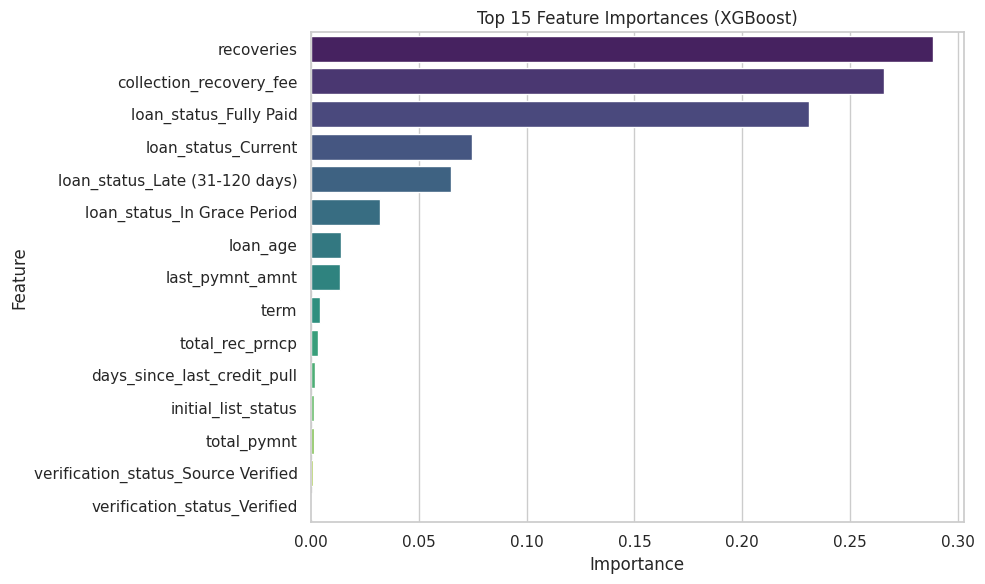

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsikan model XGBoost yang sudah dilatih disimpan dalam variabel: model_xgb
# dan fitur yang digunakan adalah X_train

# Ambil feature importances
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk mempermudah visualisasi
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


### 📊 **Insight:**

1. **Fitur paling penting:**  
   - `recoveries` dan `collection_recovery_fee` adalah fitur **paling berpengaruh** terhadap prediksi model. Ini sangat masuk akal dalam konteks risiko kredit, karena:
     - `recoveries` mengindikasikan berapa banyak dana yang berhasil dipulihkan dari pinjaman bermasalah.
     - `collection_recovery_fee` adalah biaya yang dikeluarkan untuk menagih utang—jika biaya ini tinggi, maka bisa menunjukkan risiko gagal bayar.
     
2. **Fitur status pinjaman (`loan_status_`) juga penting:**
   - `loan_status_Fully Paid`, `loan_status_Current`, `loan_status_Late (31-120 days)` memberikan informasi historis yang sangat berguna dalam menilai risiko peminjam.
   - Fitur ini menunjukkan status terakhir dari peminjam dan memberikan insight apakah peminjam punya histori pembayaran yang baik atau buruk.

3. **Fitur-fitur lain seperti `loan_age` dan `last_pymnt_amnt`:**
   - `loan_age`: Semakin lama pinjaman berlangsung, semakin besar kemungkinan masalah muncul.
   - `last_pymnt_amnt`: Bisa memberikan indikasi apakah peminjam masih melakukan pembayaran aktif atau tidak.

4. **Fitur dengan importance sangat rendah:**
   - `verification_status`, `total_pymnt`, dll., dianggap **kurang berpengaruh** dalam keputusan model.

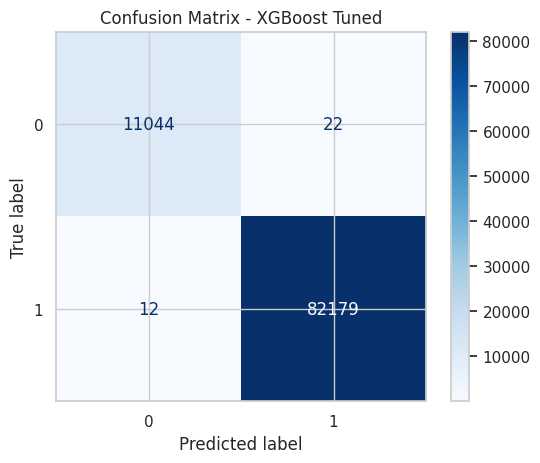

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi terhadap data test
y_pred = best_xgb.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost Tuned")
plt.show()


### 📌 Penjelasan:

1. **True Positive (TP = 82.179)**  
   - Kasus di mana model memprediksi **"layak diberi kredit"**, dan ternyata benar-benar **layak**.  
   - ✅ Ini adalah prediksi yang tepat dan diharapkan, karena orang-orang ini memang memenuhi syarat dan dapat dipercaya untuk mengembalikan kredit.  
   - **Dampak:** Perusahaan berhasil memberikan kredit kepada pelanggan yang tepat → meningkatkan pendapatan.

2. **True Negative (TN = 11.044)**  
   - Kasus di mana model memprediksi **"tidak layak diberi kredit"**, dan memang benar mereka **tidak layak**.  
   - ✅ Ini menunjukkan model dapat mengenali calon peminjam yang berisiko dengan baik.  
   - **Dampak:** Perusahaan berhasil menghindari potensi kerugian dari kredit macet.

3. **False Positive (FP = 22)**  
   - Kasus di mana model memprediksi **"layak"**, tetapi sebenarnya **tidak layak**.  
   - ❌ Ini adalah kesalahan **berisiko tinggi** karena berarti perusahaan memberikan kredit kepada orang yang tidak seharusnya mendapatkannya.  
   - **Dampak:** Bisa menyebabkan **kredit macet** → kerugian finansial.

4. **False Negative (FN = 12)**  
   - Kasus di mana model memprediksi **"tidak layak"**, tetapi sebenarnya **layak**.  
   - ❌ Ini berarti perusahaan menolak orang yang sebenarnya bisa membayar pinjaman.  
   - **Dampak:** Kehilangan potensi **keuntungan**, namun tidak menyebabkan kerugian langsung.

# **Business Simulation**

In [103]:
jum_class = pd.Series(y_test).value_counts()
jum_class

,count
status_loan,
1,82191
0,11066


Berdasarkan data test sebagai alat simulasi, diketahui:

- **Good Loans (status_loan = 1):** 82.191 pemohon  
- **Bad Loans (status_loan = 0):** 11.066 pemohon  
- **Total pemohon:** 93.257 pemohon  

---

### 🎯 **Asumsi:**

- Biaya proses satu aplikasi kredit: **Rp10.000**
- **Jika loan berhasil dibayar (Good Loan):** perusahaan mendapat **Rp50.000**
- **Jika gagal bayar (Bad Loan):** perusahaan **rugi Rp100.000**

---

## 🚫 **Simulasi Tanpa Machine Learning (Semua Diproses)**

> Semua orang diproses, tanpa memfilter siapa yang layak/tidak.

- **Total biaya:** 93.257 × Rp10.000 = **Rp932.570.000**
- **Keuntungan dari Good Loans:** 82.191 × Rp50.000 = **Rp4.109.550.000**
- **Kerugian dari Bad Loans:** 11.066 × Rp100.000 = **Rp1.106.600.000**
- **Total profit:**
  \= 4.109.550.000 − 1.106.600.000 − 932.570.000  
  = **Rp2.070.380.000**

---

## ✅ **Simulasi Dengan Machine Learning (XGBoost)**

Gunakan hasil dari confusion matrix sebelumnya:

|                        | Predicted 0 | Predicted 1 |
|------------------------|-------------|-------------|
| Actual 0 (Bad Loan)    | 11.044      | 22          |
| Actual 1 (Good Loan)   | 12          | 82.179      |

Artinya, model hanya akan **menyetujui pinjaman** ke **predicted 1**, yaitu:

- **Total pinjaman disetujui (Predicted 1):** 82.179 + 22 = **82.201**
- Di antaranya:
  - **Good Loans (TP):** 82.179 → profit
  - **Bad Loans (FP):** 22 → rugi

---

### 💸 **Perhitungan:**

- **Total biaya proses:** 82.201 × Rp10.000 = **Rp822.010.000**
- **Keuntungan dari Good Loans:** 82.179 × Rp50.000 = **Rp4.108.950.000**
- **Kerugian dari Bad Loans:** 22 × Rp100.000 = **Rp2.200.000**
- **Total profit:**
  \= 4.108.950.000 − 2.200.000 − 822.010.000  
  = **Rp3.284.740.000**

---

## 🔍 **Perbandingan:**

|                             | Tanpa ML          | Dengan ML (XGBoost) |
|-----------------------------|-------------------|---------------------|
| Total Biaya Operasional     | Rp932.570.000     | Rp822.010.000       |
| Keuntungan dari Good Loans  | Rp4.109.550.000   | Rp4.108.950.000     |
| Kerugian dari Bad Loans     | Rp1.106.600.000   | Rp2.200.000         |
| **Total Profit**            | Rp2.070.380.000   | **Rp3.284.740.000** |

---

## ✅ **Kesimpulan:**

Dengan menggunakan model XGBoost, perusahaan:

- **Mengurangi jumlah pemohon yang gagal bayar** dari 11.066 menjadi hanya **22** orang (false positive)
- **Hemat biaya proses** karena tidak memproses seluruh aplikasi
- **Naikkan profit** sebesar:  
  Rp3.284.740.000 − Rp2.070.380.000 = **Rp1.214.360.000**